# Heart Disease Risk Analysis
* **Based on a cardiovascular study of people of the Massachusetts town of Framingham, risk evaluation and estimation for potential coronary coronary artery/heart disease (CHD)**
* **Determine whether the individual has a 10-year risk of developing coronary heart disease (CHD) is the categorization objective. Information about the patients is provided by the dataset. 15 qualities and more than 4,000 records are present..**
> Above info is obtained from the information provided alongwith the dataset.
* **We will make predictions for this dataset using KNN and logistic regression.**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Loading Dataset:

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Data Preprocessing and Visualization

In [ ]:
data=df.copy()
data.shape

(4238, 16)

### Null Value and cardinality check:

In [ ]:
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview.T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Null counts,0.0,0.0,105.000000,0.0,29.000000,53.00000,0.0,0.0,0.0,50.000000,0.0,0.0,19.000000,1.000000,388.000000,0.0
Null %,0.0,0.0,2.477584,0.0,0.684285,1.25059,0.0,0.0,0.0,1.179802,0.0,0.0,0.448325,0.023596,9.155262,0.0
Cardinality,2.0,39.0,4.000000,2.0,33.000000,2.00000,2.0,2.0,2.0,248.000000,234.0,146.0,1363.000000,73.000000,143.000000,2.0


*Inference:*
* The percentage of null values across all columns is relatively low (10%) compared to the amount of the data.

* For **categorical** data, we will update null values to the **most dominant** category value.
* For **non-categorical** data, we will apply **Linear Interpolation** to that column.
> **For Categorical Data**, we **can not use interpolation** **because** Interpolation requires a mathematical relationship between data points that can be used to estimate missing values, but **categorical data does not have a natural mathematical relationship.**

In [ ]:
# generating list of categorical factors:
temp=data.drop(columns=['TenYearCHD']).nunique()
cat=temp.loc[temp.values <5].index.to_list()

# updating null values to the most dominant category:
for factor in cat:
    data[factor].fillna(data[factor].value_counts().idxmax(),inplace=True)

In [ ]:
# generating list of non-categorical factors:
temp=data.drop(columns=['TenYearCHD']).nunique()
non_cat=temp.loc[temp.values > 5].index.to_list()

# Implementing interpolation (with linear method), on known data for null values:
for factor in non_cat:
    data[factor]=data[factor].interpolate(method='linear')

In [ ]:
null_perc=data.isnull().sum()/len(data)*100
null=data.isnull().sum()
overview=pd.concat((null,null_perc,data.nunique()),axis=1, keys=['Null counts','Null %','Cardinality'])
overview.T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Null counts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cardinality,2.0,39.0,4.0,2.0,41.0,2.0,2.0,2.0,2.0,274.0,234.0,146.0,1375.0,73.0,231.0,2.0


* **No Null values left**

In [ ]:
data_clean=data.copy()

### Analysis of Density Distribution of Factors:

### diabetes, BPMeds and prevalentStroke are categorical factors (with 2 classes), and they are highly imbalanced. Such that one type of class is looking like outlier. (minority class's data points are too small compared to the majority class.)

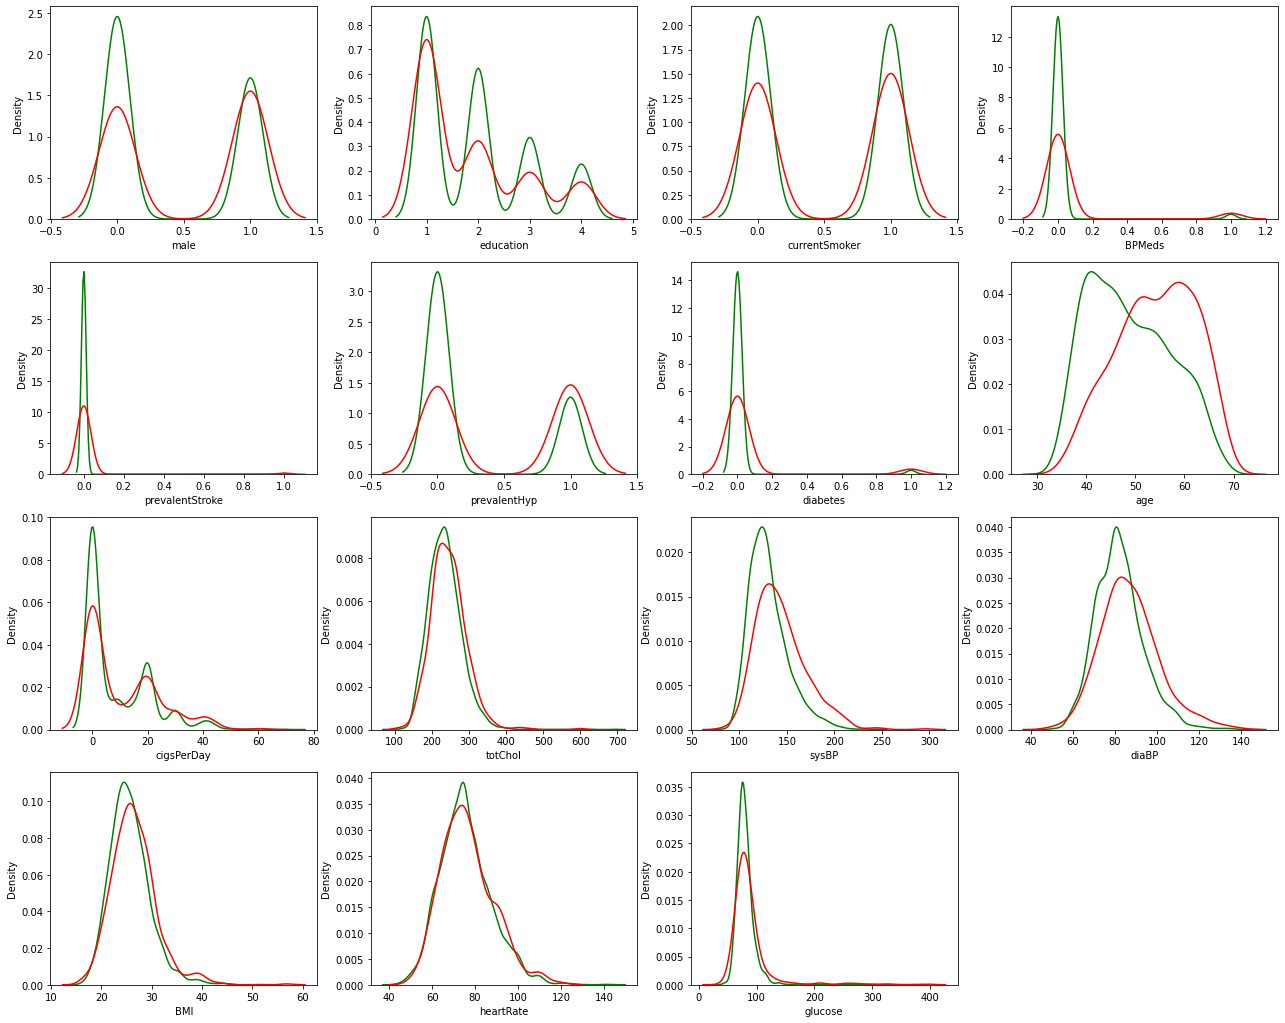

In [ ]:
fac=cat+non_cat
plt.figure(figsize=(22,18))
i=1
for factor in fac:
    plt.subplot(4,4,i)
    sns.distplot(data[factor].loc[data['TenYearCHD']==0], hist=False,color='green')
    sns.distplot(data[factor].loc[data['TenYearCHD']==1], hist=False,color='red')
    i+=1

> SMOTE: A popular **minority oversampling method** used to address the class imbalance problem in classification models.
    * **BMI**, **heartRate** and **totChol** are non-categorical factors, and they are **highly balanced**.
    * **Male audience** had **more** chances of being **affected** by CHD.
    * Higher values of **sysBP and diaBP** had more cases of CHD.
    * People of **age >50** are more **prone** to CHD.

### Correlation Analysis:

In [ ]:
# Checking correlation % with target column:
data.corrwith(data['TenYearCHD'])*100

male                 8.842757
age                 22.525610
education           -5.281226
currentSmoker        1.945627
cigsPerDay           5.787081
BPMeds               8.641714
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.256616
sysBP               21.642904
diaBP               14.529910
BMI                  7.366877
heartRate            2.290313
glucose             11.804604
TenYearCHD         100.000000
dtype: float64

<AxesSubplot:>

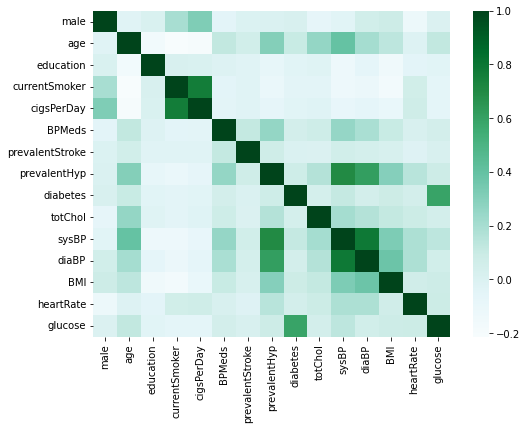

In [ ]:
corr=data.drop(columns=['TenYearCHD']).corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap='BuGn')

### sysBP, diaBP and prevalentHyp have high correlation.
### cigsPerDay, and currentSmoker have high correlation.
### glucose, and diabetes have high correlation.

In [ ]:
# dropping factors according to inferences:
data.drop(columns=['diaBP','prevalentHyp','currentSmoker','diabetes'], inplace=True)
data.shape

(4238, 12)

<AxesSubplot:>

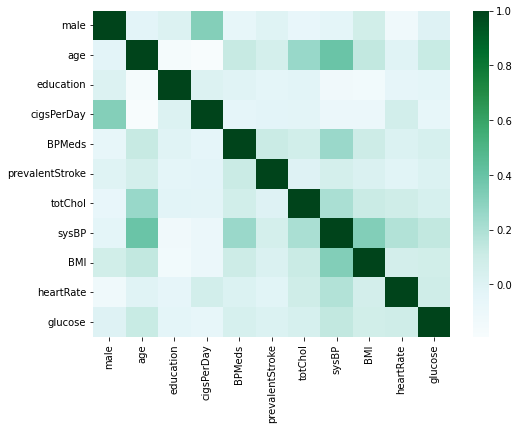

In [ ]:
corr=data.drop(columns=['TenYearCHD']).corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap='BuGn')

### Observation - No high correlations left

# Model Building

### X-Y split:

In [ ]:
X = data.drop(columns=['TenYearCHD'])
Y = data.TenYearCHD

data.shape,X.shape,Y.shape

((4238, 12), (4238, 11), (4238,))

### Train-Test Split:

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1500)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3390, 11), (3390,), (848, 11), (848,))

### Applying SMOTE on training data:

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE:
smote=SMOTE(random_state=500, sampling_strategy=0.25)
# sampling stratergy: ratio of (minority values)/(majority values), currently set to: 0.25 (1/4 ratio)
x_train_resample,y_train_resample=smote.fit_resample(x_train, y_train)

## Fitting in logistic regression model:

### For this part, we will be using the statsmodel

In [ ]:
import statsmodels.api as sm
logReg=sm.Logit(y_train_resample, sm.add_constant(x_train_resample)).fit()

Optimization terminated successfully.
         Current function value: 0.454891
         Iterations 6


### Defining the model evaluation metrics

In [ ]:
model=[]
ac=[]

In [ ]:
# importing performance metrices:
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import confusion_matrix as conf

In [ ]:
# Generaing Predictions:
# predicted values:
y_pred=logReg.predict(sm.add_constant(x_test))
y_pred
# here, logReg.predict(), gave probabilities instead of binary values
# because, in statsmodels, there is no default threshold value fixed for regression.
# hence we have to define our own threshold and convert probabilities to binary.

4202    0.108623
2192    0.144175
1996    0.108107
3001    0.206453
3883    0.372218
          ...   
3484    0.300504
2320    0.141846
3649    0.127231
3118    0.101590
1525    0.142641
Length: 848, dtype: float64

#### Converting probabilities into binary values:

In [ ]:
# Setting Threshold value:
# let threshold = t
t=0.5
# converting probabilities to binary values (as per threshold):
y_pred_binary=np.where(y_pred.values >= t, 1, 0)

#### Confusion Matrix:

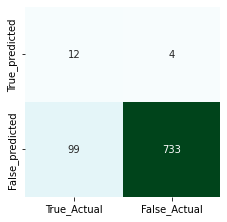

In [ ]:
cm=conf(y_test,y_pred_binary)
cm[0][0],cm[1][1]=cm[1][1],cm[0][0]
cm=pd.DataFrame(cm,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])

plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cm,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

#### Accuracy, Recall and Precision:

In [ ]:
print("Accuracy:",accuracy(y_test,y_pred_binary)*100,"%")
print("Recall:",recall(y_test,y_pred_binary)*100,"%")
print("Precision:",precision(y_test,y_pred_binary)*100,"%")

Accuracy: 87.85377358490565 %
Recall: 10.81081081081081 %
Precision: 75.0 %


In [ ]:
model.append('LogReg')
ac.append(accuracy(y_test,y_pred_binary)*100)

* *Observations:*
    * Our Model is currently **more selective than sensitive** in nature, as **precision > recall**.

* In case of any disease detection, **Recall** is a very significant metric.
* Because **False Negative** detections can be **fatal** for the life of person.
* Hence our aim is to **improve** the **recall metric (or sensitivity)** of our model.

* In order to make model more sensetive to the **Risk**:
    *  **We need to lower the threshold of our model**
    * we have used initial threshold as **0.5**
    * We have to carefully **lower our threshold** to some value, such that recall becomes significantly higher, without heavily hampering accuracy.

### In the bekow piece of code we are further optimizing

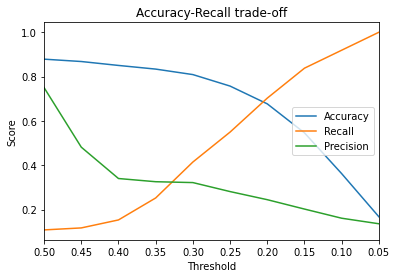

In [ ]:
y_pred_binary_curr=y_pred_binary
# plotting threshold against, accuracy, recall and precision:
threshold=[0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05]
rec=[]
acc=[]
pre=[]

for t in threshold:
    y_pred_binary_curr=np.where(y_pred >= t, 1, 0)
    acc.append(accuracy(y_test,y_pred_binary_curr))
    rec.append(recall(y_test,y_pred_binary_curr))
    pre.append(precision(y_test,y_pred_binary_curr))
    
plt.plot(threshold,acc,label='Accuracy')
plt.plot(threshold,rec,label='Recall')
plt.plot(threshold,pre,label='Precision')
plt.xlim(max(threshold), min(threshold))
plt.title("Accuracy-Recall trade-off")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

### Accuracy decreases exponentially, with decrease in threshold.
### Precision decreases linearly, with decrease in threshold.
### Recall increases linearly, with decrease in threshold.
### Most suitable value of threshold is somewhere around 0.3

In [ ]:
# Updating threshold:
t=0.3
y_pred_binary_curr=np.where(y_pred.values >= t, 1, 0)

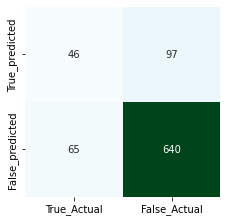

In [ ]:
cmat=conf(y_test,y_pred_binary_curr)
cmat[0][0],cmat[1][1]=cmat[1][1],cmat[0][0]
cmat=pd.DataFrame(cmat,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])
plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cmat,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

In [ ]:
print("Accuracy:",accuracy(y_test,y_pred_binary_curr)*100,"%")
print("Recall:",recall(y_test,y_pred_binary_curr)*100,"%")
print("Precision:",precision(y_test,y_pred_binary_curr)*100,"%")

Accuracy: 80.89622641509435 %
Recall: 41.44144144144144 %
Precision: 32.16783216783217 %


### Conclusion:

### Maximum accuracy obtained by our model was around 88% at initial threshold t=0.5
### But our recall (sensitivity) metric was very low 7% at t=0.5.
### Hence we had to trade-off some accuracy in order to make our model more sensetive. (i.e. to increase Recall)
### We have finally at t=0.3, obtained a significant 41% recall with 80% accuracy. (A very fair trade-off)
### We can further decrease threshold in order to make model more sensitive than selective.

# Training using KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train_resample,y_train_resample)

KNeighborsClassifier()

In [ ]:
knn.score(x_test,y_test)*100

83.25471698113208

In [ ]:
model.append('KNN')
ac.append(knn.score(x_test,y_test)*100)

### Confusion Matrix:

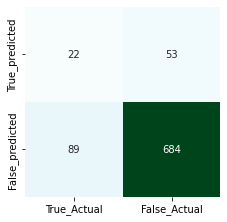

In [ ]:
y_pred=knn.predict(x_test)
cmat=conf(y_test,y_pred)
cmat[0][0],cmat[1][1]=cmat[1][1],cmat[0][0]
cmat=pd.DataFrame(cmat,index=['True_predicted','False_predicted'],columns=['True_Actual','False_Actual'])
plt.subplots(figsize=(3.5,3.5))
sns.heatmap(cmat,cmap='BuGn',annot=True,fmt='.0f',cbar=False)
plt.show()

### Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

grid={
    'n_neighbors': [1,2,3,4,5],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree'],
    'metric': ['manhattan','euclidian','minkowski']
}

In [ ]:
gr = GridSearchCV(estimator=knn, param_grid=grid).fit(x_train_resample, y_train_resample)
gr=pd.DataFrame(gr.cv_results_)
gr.T

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
mean_fit_time,0.007099,0.005895,0.006286,0.006101,0.0063,0.006494,0.007785,0.006585,0.006096,0.006582,...,0.006384,0.00738,0.00718,0.006183,0.006779,0.006908,0.006383,0.006584,0.007109,0.006983
std_fit_time,0.002044,0.000502,0.001074,0.000467,0.000412,0.000457,0.001713,0.000489,0.000221,0.000488,...,0.000487,0.00185,0.001323,0.000399,0.000748,0.000513,0.000489,0.000489,0.0017,0.000633
mean_score_time,0.03524,0.013565,0.035113,0.015966,0.038426,0.020944,0.04839,0.019673,0.037524,0.021869,...,0.028132,0.013076,0.041818,0.011672,0.03183,0.014083,0.035106,0.01546,0.03524,0.015055
std_score_time,0.00638,0.001219,0.00316,0.000632,0.001436,0.004764,0.013103,0.00176,0.002163,0.001681,...,0.002151,0.00424,0.008966,0.000747,0.001025,0.001187,0.004812,0.002746,0.007606,0.001016
param_algorithm,auto,auto,auto,auto,auto,auto,auto,auto,auto,auto,...,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree,kd_tree
param_metric,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,manhattan,...,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski
param_n_neighbors,1,1,2,2,3,3,4,4,5,5,...,1,1,2,2,3,3,4,4,5,5
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...","{'algorithm': 'auto', 'metric': 'manhattan', '...",...,"{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'...","{'algorithm': 'kd_tree', 'metric': 'minkowski'..."
split0_test_score,0.805594,0.805594,0.806993,0.805594,0.78042,0.79021,0.788811,0.802797,0.783217,0.8,...,0.779021,0.779021,0.801399,0.779021,0.776224,0.79021,0.793007,0.794406,0.781818,0.801399


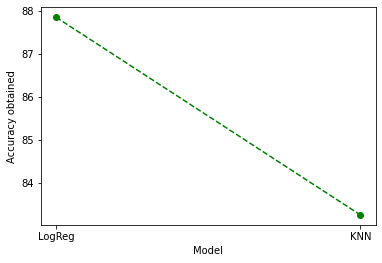

In [ ]:
plt.plot(model,ac,'go--')
plt.xlabel('Model')
plt.ylabel('Accuracy obtained')
plt.show()

# Training using Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Defining our sequential model
nn = Sequential()
nn.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='sigmoid'))
nn.add(Dense(1))

nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer='adam',loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
startnn = time.perf_counter()

EPOCHS = 10
BATCH_SIZE = 10
history = nn.fit(x_train_resample, y_train_resample, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)



endnn = time.perf_counter()

print('Execution Completed in:', endnn - startnn)

nn_timer = endnn - startnn

Epoch 1/10
358/358 [==============================] - 1s 2ms/step - loss: 0.5732 - accuracy: 0.8001 - val_loss: 0.4249 - val_accuracy: 0.8691
Epoch 2/10
358/358 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.8001 - val_loss: 0.4099 - val_accuracy: 0.8691
Epoch 3/10
358/358 [==============================] - 1s 1ms/step - loss: 0.5049 - accuracy: 0.8001 - val_loss: 0.4022 - val_accuracy: 0.8691
Epoch 4/10
358/358 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.8001 - val_loss: 0.4044 - val_accuracy: 0.8691
Epoch 5/10
358/358 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.8001 - val_loss: 0.4054 - val_accuracy: 0.8691
Epoch 6/10
358/358 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.8001 - val_loss: 0.4081 - val_accuracy: 0.8691
Epoch 7/10
358/358 [==============================] - 1s 1ms/step - loss: 0.5020 - accuracy: 0.8001 - val_loss: 0.4026 - val_accuracy: 0.8691
Epoch 

In [ ]:
score = nn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.40349194407463074
Test accuracy: 0.8691037893295288


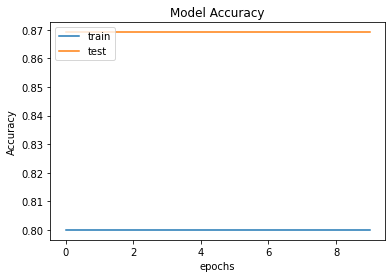

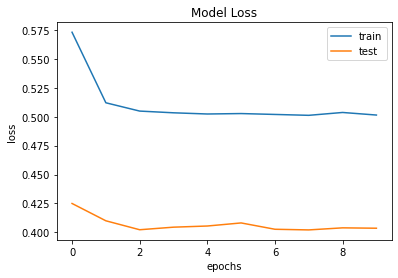

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### We can see that from the above graphs that the model performance has been constant, and no learning has happened. This might be due to several number of reasons, including the data points, the model architecutre, the model hyper parameters such as the number of nodes, activation and optimizer functions, loss function, etc.

# SVM Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
svc = SVC() 


# fit classifier to training set
svc.fit(x_train_resample, y_train_resample)


# make predictions on test set
y_pred = svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8715


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       737
           1       1.00      0.02      0.04       111

    accuracy                           0.87       848
   macro avg       0.94      0.51      0.48       848
weighted avg       0.89      0.87      0.81       848



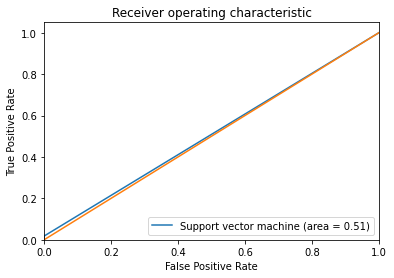

In [ ]:
svm_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict(x_test)[:])
plt.figure()
plt.plot(fpr, tpr, label='Support vector machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Since in the above graph both the roc_auc_score and the roc_curve are both super imposed on each other, it may indicate that the performance of your model is consistent across different thresholds.